# Team info
- Members:
  - Antoniadis Panagiotis - 03115009
  - Masouris Athanasios - 03115189
  - Bazotis Nikolaos - 03115739

# Importing necessary libraries

In [0]:
from google.colab import files

import pandas as pd
from pandas.api.types import is_numeric_dtype

import matplotlib.pyplot as plt

import numpy as np

from sklearn.model_selection import train_test_split

import warnings
import time

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = 10 , 10
plt.rcParams['text.color'] = "white"
plt.rcParams['xtick.color'] = "white"
plt.rcParams['ytick.color'] = "white"

# Dataset Presentation

![UCI ML Logo](http://archive.ics.uci.edu/ml/assets/logo.gif "UCI Machine Learning Repository")

For this project we use the [LSVT Voice Rehabilitation Data Set](https://archive.ics.uci.edu/ml/datasets/LSVT+Voice+Rehabilitation)  from the UCI Machine Learning Repository. It contains data produced via signal processing of the participants voice in order to assess whether voice rehabilitation treatment lead to phonations considered 'acceptable' or 'unacceptable'.


## Loading the data

In [0]:
#Uploading the data file
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving LSVT_voice_rehabilitation.xlsx to LSVT_voice_rehabilitation.xlsx
User uploaded file "LSVT_voice_rehabilitation.xlsx" with length 608091 bytes


In [0]:
#Creating pandas dataframe by reading the data file
xls = pd.ExcelFile('LSVT_voice_rehabilitation.xlsx')
df1 = pd.read_excel(xls, 'Data')
df2 = pd.read_excel(xls, 'Binary response')


## Description of features

In [0]:
m,n = df1.shape
print("Number of examples: %d" %m)
print("Number of features: %d" %n)

Number of examples: 126
Number of features: 310


In [0]:
feats = df1.columns
print("The features of the dataset are:")
print(list(feats))

The features of the dataset are:
['Jitter->F0_abs_dif', 'Jitter->F0_dif_percent', 'Jitter->F0_PQ5_classical_Schoentgen', 'Jitter->F0_PQ5_classical_Baken', 'Jitter->F0_PQ5_generalised_Schoentgen', 'Jitter->F0_abs0th_perturb', 'Jitter->F0_CV', 'Jitter->F0_TKEO_mean', 'Jitter->F0_TKEO_std', 'Jitter->F0_TKEO_prc5', 'Jitter->F0_TKEO_prc25', 'Jitter->F0_TKEO_prc75', 'Jitter->F0_TKEO_prc95', 'Jitter->F0_FM', 'Jitter->F0range_5_95_perc', 'Jitter->pitch_abs', 'Jitter->pitch_percent', 'Jitter->pitch_PQ5_classical_Schoentgen', 'Jitter->pitch_PQ5_classical_Baken', 'Jitter->pitch_PQ5_generalised_Schoentgen', 'Jitter->pitch_abs0th_perturb', 'Jitter->pitch_CV', 'Jitter->pitch_TKEO_mean', 'Jitter->pitch_TKEO_std', 'Jitter->pitch_TKEO_prc5', 'Jitter->pitch_TKEO_prc25', 'Jitter->pitch_TKEO_prc75', 'Jitter->pitch_TKEO_prc95', 'Jitter->pitch_FM', 'Jitter->pitch_range_5_95_perc', 'Shimmer->Ampl_abs_dif', 'Shimmer->Ampl_dif_percent', 'Shimmer->Ampl_PQ3_classical_Schoentgen', 'Shimmer->Ampl_PQ3_classical_Bak

This dataset has 126 examples and each of them has 310 features. Each of these features (attributes) corresponds to the application of a speech signal processing algorithm which aims to characterise objectively the signal. These algorithms include standard perturbation analysis methods, wavelet-based features, fundamental frequency-based features, and tools used to mine nonlinear time-series. Because of the extensive number of attributes we refer the interested readers to the relevant papers for further details.

## Checking for non numeric features

In [0]:
def isnumeric(df):
  #The select below returns a dataframe with the non numeric values of df1
  select = df1.select_dtypes(exclude=np.number)
  #If the shape returns 0, it means there aren't any columns with non numeric values. So flag must be True, thus the negation.
  flag = not bool(df1.select_dtypes(exclude=np.number).shape[1]) 
  #Returns a list with the column names that have non numeric values
  not_numerics = df1.select_dtypes(exclude=np.number).columns.tolist()

  return flag , not_numerics

In [0]:
numeric , not_numerics = isnumeric(df1)
if (numeric):
  print("All features have numeric values")
else:
  for key in not_numerics:
    print(key + "feature is not numeric")

All features have numeric values


## Checking for missing values

In [0]:
def missing_val(df):
  #Cheking for every example if there is a column with a missing value
  df_nulls = df.isnull().any(axis=1)
  #Checking if there is an example with a missing value
  flag = df_nulls.any()
  #Returns an array of indexes for the examples with a missing value
  null_examples = np.where(df_nulls == True)[0]

  return flag , null_examples

In [0]:
missing , examples =  missing_val(df1)
if missing:
  print("There are %d examples with missing values," %examples.size)
  print("so %f percent of total examples has missing values." %(examples.size/m *100))
  print("The examples that have missing values are the following:")
  print(examples)
else:
  print("There are no missing values")

There are no missing values


## Dataset labels

In [0]:
#Number of labels
print("The are %d labels" %df2.nunique())
print(df2.columns.values[0])

The are 2 labels
Binary class 1=acceptable, 2=unacceptable


## Checking for biased data

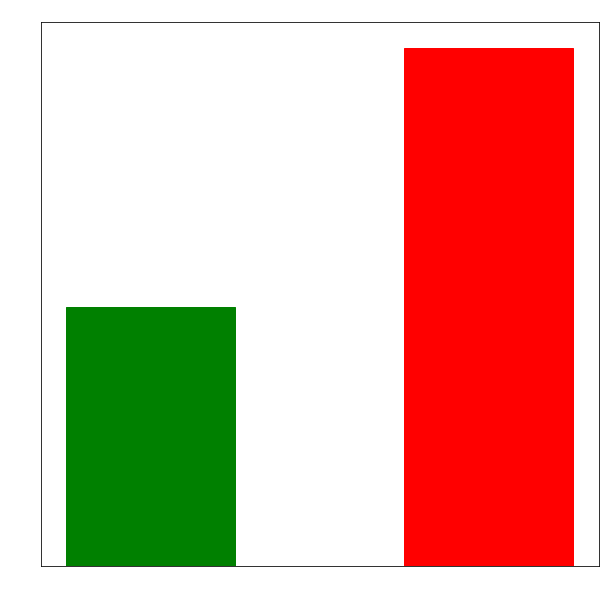

There are 42 acceptable examples and 84 unacceptable exmaples,
so 33.333333 percent of the examples are acceptable and 66.666667 percent are unacceptable.


In [0]:
n_acc = (df2['Binary class 1=acceptable, 2=unacceptable']==1).sum()
n_unacc = (df2['Binary class 1=acceptable, 2=unacceptable']==2).sum()

y = [n_acc, n_unacc]
x = ['Acceptable', 'Unacceptable']


bars = plt.bar(x,y, width=0.5)
bars[0].set_color('g')
bars[1].set_color('r')
plt.title("Features Distribution")
plt.ylabel("Number of examples" , color='w')
plt.xlabel("Labels", color='w')
plt.show()


print("There are %d acceptable examples and %d unacceptable exmaples," %(n_acc, n_unacc))
print("so %f percent of the examples are acceptable and %f percent are unacceptable." %(n_acc/m*100, n_unacc/m*100))

Based on the above information and the general fact that a binary dataset is imbalanced if there is a 60%-40% (or worse) difference in labeled examples, we can conclude that the classes in the dataset are imbalanced. So the dataset is biased in favor of the unacceptable examples.

## Train/Test split

In [0]:
# Split our data (20% of the dataset will be the test set)
train, test, train_labels, test_labels = train_test_split(df1, df2, test_size=0.20)

## Project questions

1. **Write a short dataset description** \
See [Dataset Presentation](#scrollTo=j_nJslgVdXua)
2. **Find the number of examples and features. Search if there are non numeric features and which are those.** \
See [Description of features](#scrollTo=3lAy7QUy7yeG) and [Checking for non numeric features](#scrollTo=E4GL6pL08eyI).
3. **Check if there are any headers and line numbering.** \
The first row of the data file (LSVT_voice_rehabilitation.xlsx) contains the names of corresponding features. We read the first line as headers in the pandas dataframe and we can find them [here](#scrollTo=SVPAy_LJGYMs). There is not a line numbering.
4. **Which are the labels for the corresponding classes?** \
The labels for the classes where on a different DataSheet on the same data file (LSVT_voice_rehabilitation.xlsx) and as we can see [here](#scrollTo=6S6O-dy9806k) they are 'Acceptable' and 'Unacceptable'.
5. **Did you have to modify the .txt files?** \
There is not a .txt file containing data in this dataset. The .txt file provided at the repository contains a description of the dataset.
6. **Are there any missing values in the dataset? On which examples? What is the percentage of the examples with a missing value?** \
As we can see at [Checking for missing values](#scrollTo=9b6CULKZ8rKo) there are no missing values in the dataset for all of the examples.
7. **Find how many classes there are and check the balance of the dataset by calculating the percentage of examples each class has.** \
As we can see [here](#scrollTo=6S6O-dy9806k) there are two classes. 1 for acceptable examples and 2 for unacceptable. Then at [Checking for biased data](#scrollTo=vdMHPZ6Z9Z5K) we can see that the dataset is imbalanced because 33.33% of the examples are acceptable and 66.66% unacceptable. Which means that the dataset is biased in favor of the unacceptable examples.
8. **Split the dataset to train/test sets and explain how you chose to handle the missing values and the non numeric values.** \
In the section [Train/Test split](#scrollTo=_g0gnm_oqHnN) we use the function sklearn.model_selection.train_test_split in order to split randomly our dataset to train and test subsets. We use the parameter test_size=0.20 in order to declare that we want the test set to be 20% of the whole dataset.


# Baseline classification

For this project we are going to train and optimize some dummy classifiers and the k-nearest neighbors classifier. In this section we are going to do a baseline classification in order to see how well these classifiers do on our dataset. 

First, we will convert the data from pandas dataframes to numpy arrays

In [0]:
X_train = train.to_numpy()
Y_train = train_labels.to_numpy().reshape(len(train_labels))
X_test = test.to_numpy()
Y_test = test_labels.to_numpy().reshape(len(test_labels))

## Dummy classifiers

In this section we are going to check the accuracy of the common dummy classifiers on our dataset. We are going to use the module DummyClassifier provided by sklearn. We will try the following strategies: \
- Uniform (random)
- Constant (1 or 2, for our classes)
- Most frequent
- Stratified

In [0]:
from sklearn.dummy import DummyClassifier

dc_uniform = DummyClassifier(strategy="uniform")
dc_constant_1 = DummyClassifier(strategy="constant", constant=1)
dc_constant_2 = DummyClassifier(strategy="constant", constant=2)
dc_most_frequent = DummyClassifier(strategy="most_frequent")
dc_stratified = DummyClassifier(strategy="stratified")

#The fit method from sklearn trains the model to the training set we provide as an argument.
model_uniform = dc_uniform.fit(X_train, Y_train)
model_constant_1 = dc_constant_1.fit(X_train, Y_train)
model_constant_2 = dc_constant_2.fit(X_train, Y_train)
model_most_frequent = dc_most_frequent.fit(X_train, Y_train)
model_stratified = dc_stratified.fit(X_train, Y_train)


#Using the predict method we can then make predictions on the test set

#Uniform predictions
preds_uniform = dc_uniform.predict(X_test)
print("Uniform dummy classifier - predictions:", end=" ")
print(preds_uniform)

#Constant 1
preds_constant_1 = dc_constant_1.predict(X_test)
print("Constant 1 dummy classifier - predictions:", end=" ")
print(preds_constant_1)

#Constant 2
preds_constant_2 = dc_constant_2.predict(X_test)
print("Constant 2 dummy classifier - predictions:", end=" ")
print(preds_constant_2)

#Most frequent predictions
preds_most_frequent= dc_most_frequent.predict(X_test)
print("Most frequent dummy classifier - predictions:", end=" ")
print(preds_most_frequent)

#Stratified predictions
preds_stratified= dc_stratified.predict(X_test)
print("Stratified dummy classifier - predictions:", end=" ")
print(preds_stratified)

Uniform dummy classifier - predictions: [2 2 1 1 2 2 2 2 2 1 1 2 1 2 2 1 1 2 1 1 1 2 1 1 2 1]
Constant 1 dummy classifier - predictions: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Constant 2 dummy classifier - predictions: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Most frequent dummy classifier - predictions: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Stratified dummy classifier - predictions: [1 1 2 2 1 2 2 2 2 2 2 2 1 2 2 1 2 1 2 1 1 2 2 1 2 2]


Now based on the models we trained and the predictions they produce, we are going to calculate the accuracy of each strategy on our test set.

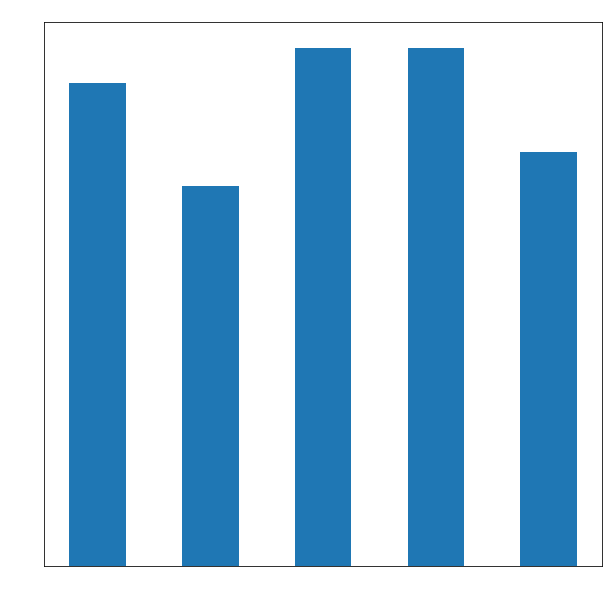

Classification Accuracy on the LSVT Voice Rehabilitation Data Set (20% test set)

constant_2 0.5769230769230769
most frequent label 0.5769230769230769
uniform 0.5384615384615384
stratified 0.46153846153846156
constant_1 0.4230769230769231


In [0]:
#Creating a dictionary with the accuracies of the dummy strategies
dummies_accuracy = {}
dummies_accuracy['uniform'] = model_uniform.score(X_test, Y_test)
dummies_accuracy['constant_1'] = model_constant_1.score(X_test, Y_test)
dummies_accuracy['constant_2'] = model_constant_2.score(X_test, Y_test)
dummies_accuracy['most frequent label'] = model_most_frequent.score(X_test, Y_test)
dummies_accuracy['stratified'] = model_stratified.score(X_test, Y_test)

#Creating a barplot for the accuracies
x = [key for key in dummies_accuracy.keys()]
y = [value for value in dummies_accuracy.values()]
bars = plt.bar(x,y, width=0.5)
plt.title("Accuracy with dummy classifiers")
plt.ylabel("Accuracy" , color='w')
plt.xlabel("Strategy", color='w')
plt.show()

#Printing the sorted results
print("Classification Accuracy on the LSVT Voice Rehabilitation Data Set (20% test set)\n")
sorted_accuracy = [(k, dummies_accuracy[k]) for k in sorted(dummies_accuracy, key=dummies_accuracy.get, reverse=True)]
for k, v in sorted_accuracy:
  print(k,v)



Since the uniform strategy is random, every time we run the above cell the accuracy calculated will be different. \
After multiple reruns of the above cell we can observe that: \


1.   Constant 2 (same as most frequent) is the best strategy for this dataset
2.   The uniform strategy (here ranks 3rd) could be the best in some runs, but generally ranks 4th. This happens because the stratified strategys' predictions respect the class distribution of the dataset and also the dataset is imbalanced.


In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
UNDERLINE = '\033[4m'
END = '\033[0m'

#Calculating the confusion matrices of the above strategies
dummies_cm = {}
dummies_cm['uniform'] = confusion_matrix(Y_test,preds_uniform)
dummies_cm['constant_1'] = confusion_matrix(Y_test,preds_constant_1)
dummies_cm['constant_2'] = confusion_matrix(Y_test,preds_constant_2)
dummies_cm['most frequent label'] = confusion_matrix(Y_test,preds_most_frequent)
dummies_cm['stratified'] = confusion_matrix(Y_test,preds_stratified)

#Calculating the f1 micro average score of the above strategies
dummies_f1_micro = {}
dummies_f1_micro['uniform'] = f1_score(Y_test, preds_uniform, average="micro")
dummies_f1_micro['constant_1'] = f1_score(Y_test, preds_constant_1, average="micro")
dummies_f1_micro['constant_2'] = f1_score(Y_test, preds_constant_2, average="micro")
dummies_f1_micro['most frequent label'] = f1_score(Y_test, preds_most_frequent, average="micro")
dummies_f1_micro['stratified'] = f1_score(Y_test, preds_stratified, average="micro")

#Calculating the f1 macro average score of the above strategies
dummies_f1_macro = {}
dummies_f1_macro['uniform'] = f1_score(Y_test, preds_uniform, average="macro")
dummies_f1_macro['constant_1'] = f1_score(Y_test, preds_constant_1, average="macro")
dummies_f1_macro['constant_2'] = f1_score(Y_test, preds_constant_2, average="macro")
dummies_f1_macro['most frequent label'] = f1_score(Y_test, preds_most_frequent, average="macro")
dummies_f1_macro['stratified'] = f1_score(Y_test, preds_stratified, average="macro")



print("Confusion matrix for the " + UNDERLINE + "uniform strategy" + END +":")
print(dummies_cm['uniform'])
print("f1-micro average: %f" %dummies_f1_micro['uniform'])
print("f1-macro average: %f" %dummies_f1_macro['uniform'])

print("\nConfusion matrix for the " + UNDERLINE + "constant 1 strategy" + END +":")
print(dummies_cm['constant_1'])
print("f1-micro average: %f" %dummies_f1_micro['constant_1'])
print("f1-macro average: %f" %dummies_f1_macro['constant_1'])

print("\nConfusion matrix for the " + UNDERLINE + "constant 2 strategy" + END +":")
print(dummies_cm['constant_2'])
print("f1-micro average: %f" %dummies_f1_micro['constant_2'])
print("f1-macro average: %f" %dummies_f1_macro['constant_2'])

print("\nConfusion matrix for the " + UNDERLINE + "most frequent strategy" + END +":")
print(dummies_cm['most frequent label'])
print("f1-micro average: %f" %dummies_f1_micro['most frequent label'])
print("f1-macro average: %f" %dummies_f1_macro['most frequent label'])

print("\nConfusion matrix for the " + UNDERLINE + "stratified strategy" + END +":")
print(dummies_cm['stratified'])
print("f1-micro average: %f" %dummies_f1_micro['stratified'])
print("f1-macro average: %f" %dummies_f1_macro['stratified'])

Confusion matrix for the uniform strategy:
[[6 5]
 [7 8]]
f1-micro average: 0.538462
f1-macro average: 0.535714

Confusion matrix for the constant 1 strategy:
[[11  0]
 [15  0]]
f1-micro average: 0.423077
f1-macro average: 0.297297

Confusion matrix for the constant 2 strategy:
[[ 0 11]
 [ 0 15]]
f1-micro average: 0.576923
f1-macro average: 0.365854

Confusion matrix for the most frequent strategy:
[[ 0 11]
 [ 0 15]]
f1-micro average: 0.576923
f1-macro average: 0.365854

Confusion matrix for the stratified strategy:
[[ 4  7]
 [ 5 10]]
f1-micro average: 0.538462
f1-macro average: 0.512500


### Confusion matrices

So based on the output above, we have the following confusion matrices:

**Uniform Strategy**

|                            | Predicted Acceptables(1) | Predicted Unacceptables(2) |
|----------------------------|-----------------------|-------------------------|
| Actual Acceptables(1)   |           6           |            5            |
| Actual Unacceptables(2) |           7           |            8            |

**Constant 1 Strategy**

|                            | Predicted Acceptables(1) | Predicted Unacceptables(2) |
|----------------------------|-----------------------|-------------------------|
| Actual Acceptables(1)   |           11           |            0            |
| Actual Unacceptables(2) |           15           |            0            |

**Constant 2 Strategy**

|                            | Predicted Acceptables(1) | Predicted Unacceptables(2) |
|----------------------------|-----------------------|-------------------------|
| Actual Acceptables(1)   |           0           |            11            |
| Actual Unacceptables(2) |           0           |            15            |

**Most frequent Strategy**

|                            | Predicted Acceptables(1) | Predicted Unacceptables(2) |
|----------------------------|-----------------------|-------------------------|
| Actual Acceptables(1)   |           0           |            11            |
| Actual Unacceptables(2) |           0           |            15            |


**Stratified Strategy**

|                            | Predicted Acceptables(1) | Predicted Unacceptables(2) |
|----------------------------|-----------------------|-------------------------|
| Actual Acceptables(1)   |           4           |            7            |
| Actual Unacceptables(2) |           5           |            10            |

### F1 scores

The f1 micro and macro averages based on the above confusion matrices are the following:

- Uniform strategy
  - f1-micro average: 0.538462
  - f1-macro average: 0.535714

- Constant 1 strategy 
  - f1-micro average: 0.423077
  - f1-macro average: 0.297297

- Constant 2 strategy 
  - f1-micro average: 0.576923
  - f1-macro average: 0.365854

- Most frequent strategy 
  - f1-micro average: 0.576923
  - f1-macro average: 0.365854

- Stratified strategy 
  - f1-micro average: 0.538462
  - f1-macro average: 0.512500

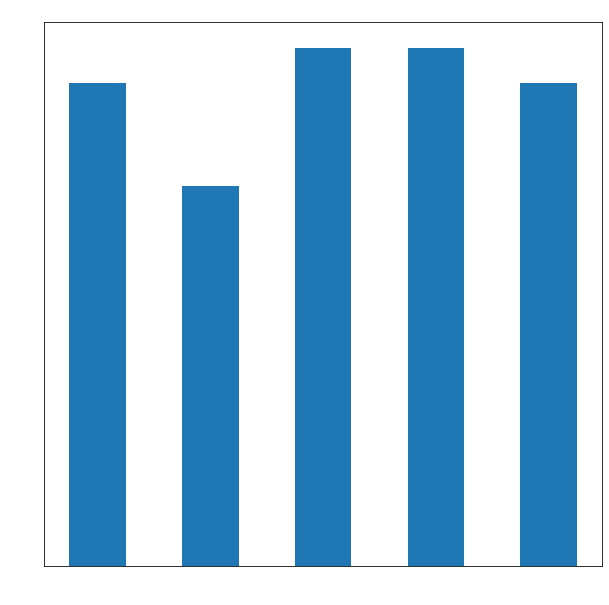

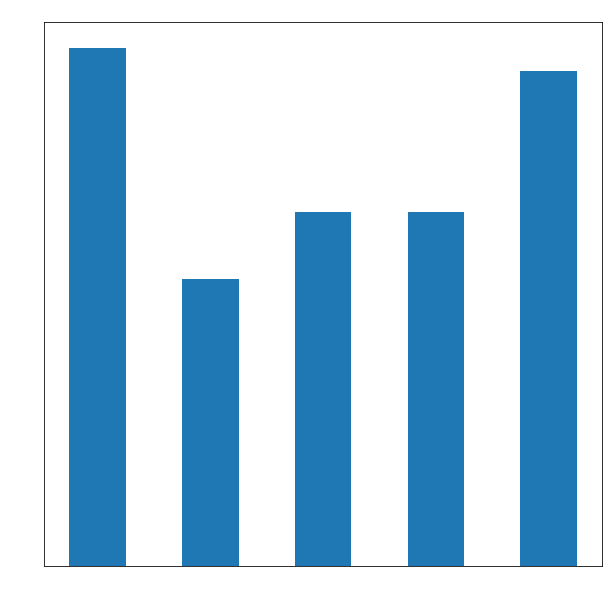

In [0]:
#Creating a barplot for the F1 micro averages
x_micro = [key for key in dummies_f1_micro.keys()]
y_micro = [value for value in dummies_f1_micro.values()]
bars = plt.bar(x_micro,y_micro, width=0.5)
plt.title("f1 micro score with dummy classifiers")
plt.ylabel("f1 micro score" , color='w')
plt.xlabel("Strategy", color='w')
plt.show()

#Creating a barplot for the F1 micro averages
x_macro = [key for key in dummies_f1_macro.keys()]
y_macro = [value for value in dummies_f1_macro.values()]
bars = plt.bar(x_macro,y_macro, width=0.5)
plt.title("f1 macro score with dummy classifiers")
plt.ylabel("f1 macro score" , color='w')
plt.xlabel("Strategy", color='w')
plt.show()

### Classification reports

In [0]:
from sklearn.metrics import classification_report

print("\nClassification Precision, Recall, F1 on the LSVT Voice Rehabilitation Data Set (20% test set)")

print("\n"+UNDERLINE+"Uniform strategy"+END+"\n")
print(classification_report(Y_test, preds_uniform))
print("\n"+UNDERLINE+"Constant 1 strategy"+END+"\n")
print(classification_report(Y_test, preds_constant_1))
print("\n"+UNDERLINE+"Constant 2 strategy"+END+"\n")
print(classification_report(Y_test, preds_constant_2))
print("\n"+UNDERLINE+"Most frequent strategy"+END+"\n")
print(classification_report(Y_test, preds_most_frequent))
print("\n"+UNDERLINE+"Stratified strategy"+END+"\n")
print(classification_report(Y_test, preds_stratified))



Classification Precision, Recall, F1 on the LSVT Voice Rehabilitation Data Set (20% test set)

Uniform strategy

              precision    recall  f1-score   support

           1       0.46      0.55      0.50        11
           2       0.62      0.53      0.57        15

    accuracy                           0.54        26
   macro avg       0.54      0.54      0.54        26
weighted avg       0.55      0.54      0.54        26


Constant 1 strategy

              precision    recall  f1-score   support

           1       0.42      1.00      0.59        11
           2       0.00      0.00      0.00        15

    accuracy                           0.42        26
   macro avg       0.21      0.50      0.30        26
weighted avg       0.18      0.42      0.25        26


Constant 2 strategy

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        11
           2       0.58      1.00      0.73        15

    accuracy            

## kNN classifier

In this section we are going to use the k Nearest Neighbors Classifier. \

The kNN algorithm is a non-parametric classification method. An object is classified to the class most common among its k nearest neighbors. \
\
The value of k is usually a small integer. \
\
For this section the value of k will be 5 (n_neighbors=5). We are going to search for the optimal value of k in a later section. 

In [0]:
#importing the modules from sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#Chosen value of k is 5
k=5

knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(X_train, Y_train)
pred = knn.predict(X_test)
print("The accuracy score for kNN algorithm with k=%d is: %f" %(k,accuracy_score(Y_test, pred)))

The accuracy score for kNN algorithm with k=5 is: 0.500000


### Confusion matrix

In [0]:
knn_5_cm = confusion_matrix(Y_test,pred)
print(knn_5_cm)

[[ 3  8]
 [ 5 10]]


**kNN algorithm (k=5)**

|                            | Predicted Acceptables(1) | Predicted Unacceptables(2) |
|----------------------------|-----------------------|-------------------------|
| Actual Acceptables(1)   |           3           |            8            |
| Actual Unacceptables(2) |           5           |            10            |

### F1 scores

In [0]:
knn_5_f1_micro = f1_score(Y_test, pred, average="micro")
knn_5_f1_macro = f1_score(Y_test, pred, average="macro")

print("f1-micro average: %f" %knn_5_f1_micro)
print("f1-macro average: %f" %knn_5_f1_macro)

f1-micro average: 0.500000
f1-macro average: 0.460925


The f1 micro and macro averages based on the above confusion matrix are the following:

- f1-micro average: 0.5
- f1-macro average: 0.460925

### Classification report

In [0]:
print("\nClassification Precision, Recall, F1 on the LSVT Voice Rehabilitation Data Set (20% test set) for kNN algorithm (k=5)")
print(classification_report(Y_test, pred))


Classification Precision, Recall, F1 on the LSVT Voice Rehabilitation Data Set (20% test set) for kNN algorithm (k=5)
              precision    recall  f1-score   support

           1       0.38      0.27      0.32        11
           2       0.56      0.67      0.61        15

    accuracy                           0.50        26
   macro avg       0.47      0.47      0.46        26
weighted avg       0.48      0.50      0.48        26



## Cumulatively F1-scores plots

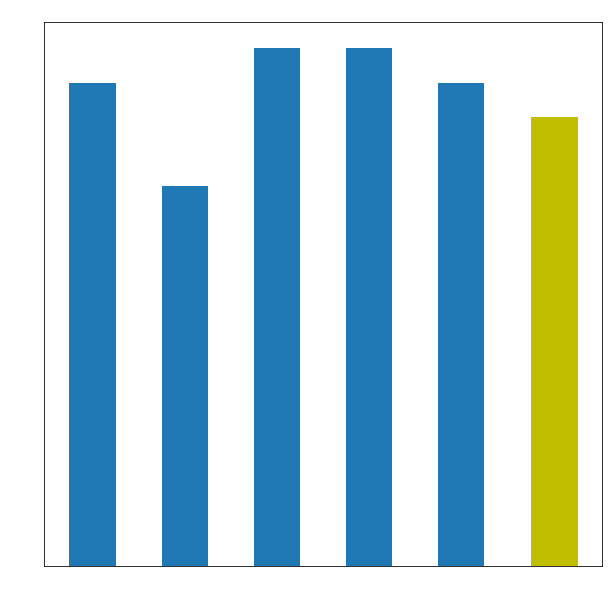

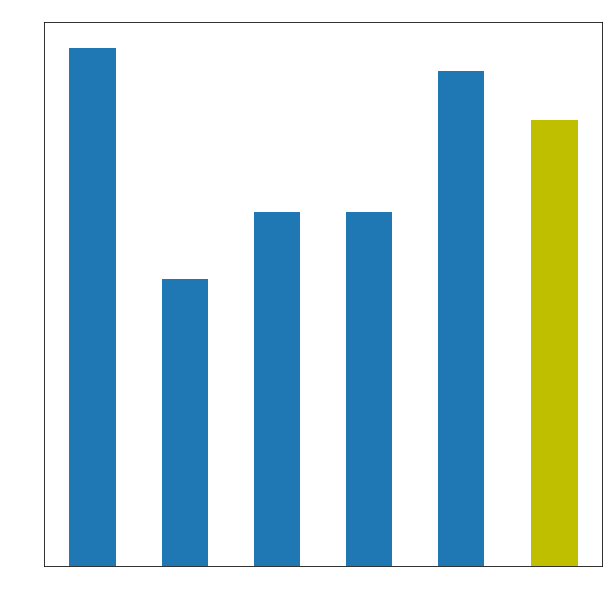

In [0]:
#Creating a barplot for the F1 micro averages
x_micro_com = x_micro.copy()
x_micro_com.append("kNN algorithm (k=5)")
y_micro_com = y_micro.copy()
y_micro_com.append(knn_5_f1_micro)

bars = plt.bar(x_micro_com,y_micro_com, width=0.5)
bars[5].set_color('y')
plt.title("f1 micro score on different classifiers")
plt.ylabel("f1 micro score" , color='w')
plt.xlabel("Strategy", color='w')
plt.show()

#Creating a barplot for the F1 micro averages
x_macro_com = x_macro.copy()
x_macro_com.append("kNN algorithm (k=5)")
y_macro_com = y_macro.copy()
y_macro_com.append(knn_5_f1_macro)

bars = plt.bar(x_macro_com,y_macro_com, width=0.5)
bars[5].set_color('y')
plt.title("f1 macro score on different classifiers")
plt.ylabel("f1 macro score" , color='w')
plt.xlabel("Strategy", color='w')
plt.show()

## Project questions

1. See the [Dummy classifiers](#scrollTo=Fx_cygCpuHJi) and [kNN classifier](#scrollTo=sW8JbqynzMzx) subsections.
2. See [Cumulatively F1-scores plots](#scrollTo=B4TqDm40qiQr)
3. First of all, its significant to remember what this dataset is about:

  The LSVT Voice Rehabilitation dataset is about patients undergoing voice rehabilitation treatment in order to speak with acceptable vocal sounds (phonations). So its clear that it is more important to don't give false hopes, that the treatment lead to acceptable phonations, than to say that a patient needs more treatment even though his phonations are already acceptable.

  The above statement means that our classifier has to be precise. In the sections above we noticed that the classifier that achieves the best precision is the uniform dummy classifier. Since the uniform classifier does random predicitons, most of the time ranked second and the most precise classifier was the stratified dummy classifier, which respects the distribution of examples for the classes.

  Furthermore we can see in the plots above that these classifiers have good both f1 micro and f1 macro scores. This is because the examples of the test set are picked randomly, so the test set probably has the same distribution of examples for each class as the training set.

  On the other hand we can see that constant 2 strategy (same as most frequent) has a good f1 micro score but a bad f1 macro score due to the imbalance of the dataset.

  At last, we can see that kNN classifier performs fairly on the dataset for a baseline classification. It has good both micro and macro f1 scores, but the accuracy is just 50%. As we can see in the confusion matrix of the kNN classifier, this happens because many examples are classified as "Unacceptable" due to the imbalance of the classes, which means more neighbors "voting" the favored class.



# Classifiers optimization

In this section we are going to implement some optimization techniques such as dataset pre-processing and hyperparameter optimization. 

## Data pre-processing

We are going to try the following pre-processing methods: \
- Dimensionality reduction:
  - Feature Selection (Variance threshold)
  - Feature Extraction (Principal Components Analysis - PCA)
- Normalization (z-score)
- Balancing the data (Oversampling)

**Note**: We won't try to balance the data with the Undersampling method since we already have a very small dataset. Undersampling it will lead to a 33.33% loss of our dataset, as we can see at the [Checking for biased data](#scrollTo=vdMHPZ6Z9Z5K) section. Also min-max scaling didn't improved the performance so it won't be used as a normalization process.

### Feature selection - Variance Threshold

First we have to understand why dimensionality reduction is important for the k Nearest Neighbors (kNN) algorithm, regardless of the computanional cost. \
\
The distance metric calculated by the kNN algorithm is the Euclidean distance. This distance measure will become meaningless if we have a very high dimensional dataset and it is even worse if we have a small amount of examples like in our dataset. \
\
On the other hand dimensionality reduction won't help the performance of the dummy classifiers (it won't cause any damage either) since they only rely on the distribution of the labels in our dataset. 
\
\
We will apply a feature selector that removes all the low-variance features. This method is called Variance Threshold. The default value of the threshold is zero, which means that the selector will remove all the features with constant values. We will try different thresholds later and compare the results.

In [0]:
from sklearn.feature_selection import VarianceThreshold

def feat_select(train, test, thresh):
  # Initializing a selector
  selector = VarianceThreshold(threshold=thresh)
  # Fiting the selector on the training set
  train_reduced = selector.fit_transform(train)

  #Applying the selector on the test set
  test_reduced = selector.transform(test)

  return train_reduced, test_reduced

### Feature Extraction - PCA

We are going to apply the Principal Components Analysis as a method for feature extraction in order to achieve dimensionality reduction. The number of components is a new hyperparameter. We will experiment with different values later.

In [0]:
from sklearn.decomposition import PCA

def princ_comp_analysis(train, test , n):
  
  pca = PCA(n_components=n)

  # The transformation must be the same both on the training and test set.
  # The principal components are calculated on the training set
  train_PCA = pca.fit_transform(train)
  test_PCA = pca.transform(test)

  return train_PCA, test_PCA

### Normalization - z-score

Τhe normalization method is important for the k Nearest Neighbors (kNN) algorithm. \\

Lets say that we have the following features in our dataset:
- x<sub>1</sub> : with values in the range [0,1]
- x<sub>2</sub> : with values in the range [-100000,100000]

In order to find the k nearest neighbors, the kNN algorithm will calculate the distances. The most widely used distance metric for kNN is the Euclidean distance. So when taking the euclidean distance between pairs of examples, the values of the feature x<sub>1</sub> will probably become uninformative and the algorithm would rely only on the values of the x<sub>2</sub> feature. So normalization will help the kNN algorithm to take into consideration all the features. \\

For the same reason as described above scaling the data won't help the performance of the dummy classifiers.


In [0]:
from sklearn import preprocessing

def feat_norm(train , test):
  #Creating a scaler object and applying fit on the training set
  scaler = preprocessing.StandardScaler().fit(train)

  #Standardizing the features of the training set
  train_scaled = scaler.transform(train)

  #Now we have to standarize the test data but with the mean and standard deviation values calculated on the training set.
  test_scaled = scaler.transform(test)

  return train_scaled, test_scaled

### Balancing the data - Oversampling

Balancing the data is the last significant step of data pre-processing in the cross validation phase. \
\
This processing though will affect not only the performance of the kNN classifier, but the performance of the dummy classifiers too. 


**kNN algorithm** \
As we described above, the kNN algorithm classifies an object to the class most common among its k nearest neighbors. If though the dataset is imbalanced, it means that one of the classes has more objects than the other.

In [0]:
train_acc = (train_labels['Binary class 1=acceptable, 2=unacceptable']==1).sum()
train_unacc = (train_labels['Binary class 1=acceptable, 2=unacceptable']==2).sum()

print("There are %d acceptable examples and %d unacceptable exmaples," %(train_acc, train_unacc))

There are 31 acceptable examples and 69 unacceptable exmaples,


 In our dataset for example, we have 69 objects classified as "Unacceptable" and just 31 classified as "Acceptable". So in datasets like this, it is possible for an object to be missclassified because whilst it is closer to an object of class A (e.g. "Acceptable"), it has more neighbors in class B (e.g. "Unacceptable") due to the imbalanced number of examples. \
**Dummy classifiers** \
The performance of the dummy classifiers relies on the distribution of the classes in our dataset. If the dataset was to become balanced, the dummy strategy "Most frequent" has no meaning since there is 50-50 dataset. Also the performance of the stratified strategy will change as the distribution of the dataset labels changes. 


In [0]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import MultiLabelBinarizer

def oversampling(train,train_labels):
  
  # Initializing RandomOverSampler
  ros = RandomOverSampler(random_state=0)
  #Applying oversampling
  train_resampled, trainTargets_resampled = ros.fit_sample(train,train_labels)

  return train_resampled, trainTargets_resampled

## Hyperparameter tuning

In order to optimize our hyperparameters, we are going to implement 10-fold cross validation with gridsearch.

The hyperparameters we have to tune are the following:
- Variance threshold for feature selection
- Number of components for PCA
- The value of k for the kNN algorithm

There are no hyperparameters to tune for the Dummy classifiers.

### 10-fold cross validation

The function below splits the training dataset into k (given as argument) folds. \
Each element of a fold is chosen randomly.\
The fuction returns two lists of arrays.

In [0]:
from random import randrange
from math import ceil

# Split the training set into folds
def kfold_split(X_train, Y_train, folds):
  
  X_train_split = list()
  X_train_copy = list(X_train)
  
  Y_train_split = list()
  Y_train_copy = list(Y_train)

  #There may be a fold with less examples than the others
  fold_size = ceil(len(X_train) / folds)

  for i in range(folds):
    X_fold = list()
    Y_fold = list()
    while (len(X_fold) < fold_size) and (len(X_train_copy)>0):
      #Random index for the object to be removed from copied list 
      #and appended to the specific iterations' fold
      index = randrange(len(X_train_copy))
      X_fold.append(X_train_copy.pop(index))
      Y_fold.append(Y_train_copy.pop(index))

    X_train_split.append(np.array(X_fold))
    Y_train_split.append(np.array(Y_fold))

  return X_train_split, Y_train_split

### Pre-processing function

In [0]:
#The function below does data pre-processing based on the given arguments
#
# Parameters:
#   -variance_threshold: int/float/double, the variance threshold to use on feature selection
#   -normalization: boolean 
#   -n_components: integer, the number of components for the Principal Components Analysis
#   -balanced: boolean, true for oversampling
#   -x_train: training set
#   -y_train: training labels
#   -x_test: test set
#
# Output:
#   -x_train_resampled: the training set after applying the pre-processing techniques 
#   -y_train_resampled: the training labels after applying the pre-processing techniques 
#   -x_test_pca: the test set after applying the pre-processing techniques 

def pre_processing(variance_threshold, normalization, n_components, balanced, x_train, y_train, x_test):

  #Feature selection
  if variance_threshold!=None: x_train_reduced, x_test_reduced = feat_select(x_train, x_test, variance_threshold)
  else: x_train_reduced, x_test_reduced = x_train, x_test

  #Normalization
  if normalization: x_train_normalized, x_test_normalized = feat_norm(x_train_reduced , x_test_reduced)
  else: x_train_normalized, x_test_normalized = x_train_reduced, x_test_reduced

  #Oversampling
  if balanced: x_train_resampled, y_train_resampled = oversampling(x_train_normalized, y_train) 
  else: x_train_resampled, y_train_resampled = x_train_normalized, y_train 
  
  #PCA
  if n_components!=None: x_train_pca, x_test_pca = princ_comp_analysis(x_train_resampled, x_test_normalized , n_components)
  else: x_train_pca, x_test_pca = x_train_resampled, x_test_normalized

  return x_train_pca, y_train_resampled, x_test_pca

### Grid search

In this section we implement the Grid Search Cross Validation. With this method of cross validation we basically try all different combinations of given values for hyperparameters with all different pre-processing of data techniques. Then for each combination we compute the f1-score average (type given as argument to the function) with the process of 10-fold cross validation. 

\
**Note**: Due to the small size of the dataset and the fact that it is unbalanced ([see here](#scrollTo=vdMHPZ6Z9Z5K)), we noticed that every rerun of the train_test_split function ([see here](#scrollTo=_g0gnm_oqHnN)) leads to slightly different optimal values for the hyperparamaters and different architecture model for pre-processing.

In [0]:
#The function below removes a specific array arr from a list L of arrays
def remove_array(L,arr):
    ind = 0
    size = len(L)
    while ind != size and not np.array_equal(L[ind],arr):
        ind += 1
    if ind != size:
        L.pop(ind)
        return L
    else:
        raise ValueError('array not found in list.')

In [0]:
from tqdm import tqdm, tqdm_notebook


#A function that finds the pre-processing architecture and hyperparameters values that maximize the given 
#average metric (f1 micro or macro) using kNN algorithm.
#
# Parameters:
#   -X_train: array of training set examples
#   -Y_train: array of training set labels
#   -var_thresh: list of values for variance threshold feature selection
#    (input [None] if you don't want to use Variance Threshold)
#   -n_components: lists of values for the PCA hyperparameter
#    (input [None] if you don't want to use PCA)
#   -n_neighbors: lists of values for the kNN hyperparameter
#   -balanced: boolean list [True] to balance the data, [False] 
#    to not balance the data , or [True, False] to try both architectures
#   -normalization: boolean list [True] to normalize the data, [False] 
#    to not normalize the data , or [True, False] to try both architectures
#   -average: String value to specify which metric to use. It can be either 'micro' or 'macro'
#
# Output:
#   -best_f1: the max value of the specified metric it calculated
#   -values: a dictionary containing the specific parameters that lead to the above maximum value of the metric



def gridsearch(X_train, Y_train, var_thresh, n_components, n_neighbors, balanced, normalization, average):
  #Computing the folds for the 10-fold cross validation
  x_folds, y_folds = kfold_split(X_train, Y_train, 10)

  #Initializing the metric that we want to maximize
  best_f1 = 0
  #In the dictionary below we are going to keep the specific architecture
  #and hyperparameters that lead to the max value of our metric
  values = {}

  #We use tqdm_notebook to visualize a progress bar at the output
  for var in tqdm_notebook(var_thresh, desc='Grid search'):
    for comp in n_components:      
      for bal in balanced:
        for norm in normalization:
          for neigh in n_neighbors:
            scores = []
            for x_test,y_test in zip(x_folds,y_folds):
              
              x_train = x_folds.copy()
              #removing the fold that we will use as test set for this iteration
              x_train = remove_array(x_train,x_test) 
              #concatenating the rest of the folds
              x_train = np.concatenate(x_train)

              y_train = y_folds.copy()
              #removing the fold that we will use as test set for this iteration
              y_train = remove_array(y_train,y_test)
              #concatenating the rest of the folds
              y_train = np.concatenate(y_train)

              #Data pre-preprocessing
              x_train, y_train, x_test = pre_processing(var, norm, comp, bal, x_train, y_train, x_test)

              #kNN classifier
              knn = KNeighborsClassifier(n_neighbors = neigh)
              knn.fit(x_train, y_train)
              pred = knn.predict(x_test)

              f1 = f1_score(y_test, pred, average=average)
              scores.append(f1)

            #Getting the mean value of the f1 scores calculated via 10-fold cross validation
            f1 = np.mean(scores) 
            if (f1>best_f1):
              best_f1 = f1
              values['variance_threshold'] = var
              values['n_components'] = comp
              values['balanced'] = bal
              values['normalized'] = norm
              values['n_neighbors'] = neigh

  return best_f1, values



## Dummy classifiers

As we explained in each subsection of the [Data pre-processing](#scrollTo=pPyUyQ0o0T8Y), only the oversamping technique has an impact on the performance of the dummy classifiers since they rely only on the frequency of appearance of each label in the dataset. 

So lets see the performance on the oversampled data.

In [0]:
x_dummy_oversampled, y_dummy_oversampled = oversampling(X_train, Y_train)

Now x_dummy_oversampled and y_dummy_oversampled contain even data of each class. So lets train the dummy classifiers on the new training set.

In [0]:
dc_uniform_opt = DummyClassifier(strategy="uniform")
dc_constant_1_opt = DummyClassifier(strategy="constant", constant=1)
dc_constant_2_opt = DummyClassifier(strategy="constant", constant=2)
dc_most_frequent_opt = DummyClassifier(strategy="most_frequent")
dc_stratified_opt = DummyClassifier(strategy="stratified")

#The fit method from sklearn trains the model to the training set we provide as an argument.
dc_uniform_opt.fit(x_dummy_oversampled, y_dummy_oversampled)
dc_constant_1_opt.fit(x_dummy_oversampled, y_dummy_oversampled)
dc_constant_2_opt.fit(x_dummy_oversampled, y_dummy_oversampled)
dc_most_frequent_opt.fit(x_dummy_oversampled, y_dummy_oversampled)
dc_stratified_opt.fit(x_dummy_oversampled, y_dummy_oversampled)

DummyClassifier(constant=None, random_state=None, strategy='stratified')

Now that all the dummy classifiers are trained, lets make predictions on the test set and see how much the oversampling impacted on the performance of the classifiers.

### Accuracy plot

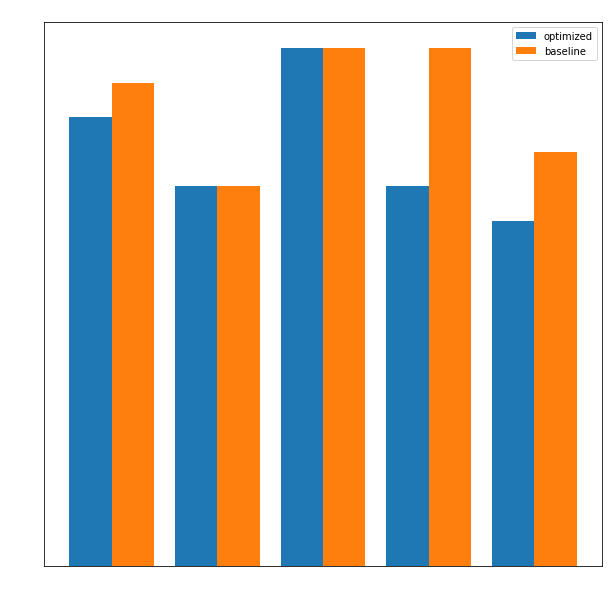

Classification Accuracies on the LSVT Voice Rehabilitation Data Set (20% test set)

constant_2 0.5769230769230769
uniform 0.5
constant_1 0.4230769230769231
most frequent label 0.4230769230769231
stratified 0.38461538461538464


In [0]:
#Creating a dictionary with the accuracies of the dummy strategies
dummies_accuracy_opt = {}
dummies_accuracy_opt['uniform'] = dc_uniform_opt.score(X_test, Y_test)
dummies_accuracy_opt['constant_1'] = dc_constant_1_opt.score(X_test, Y_test)
dummies_accuracy_opt['constant_2'] = dc_constant_2_opt.score(X_test, Y_test)
dummies_accuracy_opt['most frequent label'] = dc_most_frequent_opt.score(X_test, Y_test)
dummies_accuracy_opt['stratified'] = dc_stratified_opt.score(X_test, Y_test)

#Creating a barplot for the accuracies 
x_opt = [key for key in dummies_accuracy_opt.keys()]
y_opt = [value for value in dummies_accuracy_opt.values()]
x_len = np.arange(len(x_opt))
bars = plt.bar(x_len-0.2,y_opt, width=0.4, label="optimized")
bars = plt.bar(x_len+0.2,y, width=0.4, label ="baseline")
plt.xticks(x_len,x_opt)
plt.title("Accuracy with dummy classifiers")
plt.ylabel("Accuracy" , color='w')
plt.xlabel("Strategy", color='w')


leg = plt.legend()
for text in leg.get_texts():
    plt.setp(text, color = 'black')

plt.show()

#Printing the sorted results
print("Classification Accuracies on the LSVT Voice Rehabilitation Data Set (20% test set)\n")
sorted_accuracy = [(k, dummies_accuracy_opt[k]) for k in sorted(dummies_accuracy_opt, key=dummies_accuracy_opt.get, reverse=True)]
for k, v in sorted_accuracy:
  print(k,v)

### Confusion matrices and f1 scores

In [0]:
#Uniform predictions
preds_uniform_opt = dc_uniform_opt.predict(X_test)
print("Uniform dummy classifier - predictions:", end=" ")
print(preds_uniform_opt)

#Constant 1
preds_constant_1_opt = dc_constant_1_opt.predict(X_test)
print("Constant 1 dummy classifier - predictions:", end=" ")
print(preds_constant_1_opt)

#Constant 2
preds_constant_2_opt = dc_constant_2_opt.predict(X_test)
print("Constant 2 dummy classifier - predictions:", end=" ")
print(preds_constant_2_opt)

#Most frequent predictions
preds_most_frequent_opt= dc_most_frequent_opt.predict(X_test)
print("Most frequent dummy classifier - predictions:", end=" ")
print(preds_most_frequent_opt)

#Stratified predictions
preds_stratified_opt= dc_stratified_opt.predict(X_test)
print("Stratified dummy classifier - predictions:", end=" ")
print(preds_stratified_opt)

Uniform dummy classifier - predictions: [1 2 1 1 2 2 2 1 1 2 1 2 1 2 1 2 2 2 2 2 1 2 1 2 1 1]
Constant 1 dummy classifier - predictions: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Constant 2 dummy classifier - predictions: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Most frequent dummy classifier - predictions: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Stratified dummy classifier - predictions: [2 1 1 1 1 1 2 2 2 2 2 1 2 2 1 2 2 2 1 1 1 1 1 2 1 2]


In [0]:
#Calculating the confusion matrices of the above strategies
dummies_cm_opt = {}
dummies_cm_opt['uniform'] = confusion_matrix(Y_test,preds_uniform_opt)
dummies_cm_opt['constant_1'] = confusion_matrix(Y_test,preds_constant_1_opt)
dummies_cm_opt['constant_2'] = confusion_matrix(Y_test,preds_constant_2_opt)
dummies_cm_opt['most frequent label'] = confusion_matrix(Y_test,preds_most_frequent_opt)
dummies_cm_opt['stratified'] = confusion_matrix(Y_test,preds_stratified_opt)

#Calculating the f1 micro average score of the above strategies
dummies_f1_micro_opt = {}
dummies_f1_micro_opt['uniform'] = f1_score(Y_test, preds_uniform_opt, average="micro")
dummies_f1_micro_opt['constant_1'] = f1_score(Y_test, preds_constant_1_opt, average="micro")
dummies_f1_micro_opt['constant_2'] = f1_score(Y_test, preds_constant_2_opt, average="micro")
dummies_f1_micro_opt['most frequent label'] = f1_score(Y_test, preds_most_frequent_opt, average="micro")
dummies_f1_micro_opt['stratified'] = f1_score(Y_test, preds_stratified_opt, average="micro")

#Calculating the f1 macro average score of the above strategies
dummies_f1_macro_opt = {}
dummies_f1_macro_opt['uniform'] = f1_score(Y_test, preds_uniform_opt, average="macro")
dummies_f1_macro_opt['constant_1'] = f1_score(Y_test, preds_constant_1_opt, average="macro")
dummies_f1_macro_opt['constant_2'] = f1_score(Y_test, preds_constant_2_opt, average="macro")
dummies_f1_macro_opt['most frequent label'] = f1_score(Y_test, preds_most_frequent_opt, average="macro")
dummies_f1_macro_opt['stratified'] = f1_score(Y_test, preds_stratified_opt, average="macro")

In [0]:
print("Confusion matrix for the " + UNDERLINE + "optimized uniform strategy" + END +":")
print(dummies_cm_opt['uniform'])
print("f1-micro average: %f" %dummies_f1_micro_opt['uniform'])
print("f1-macro average: %f" %dummies_f1_macro_opt['uniform'])

print("\nConfusion matrix for the " + UNDERLINE + "optimized constant 1 strategy" + END +":")
print(dummies_cm_opt['constant_1'])
print("f1-micro average: %f" %dummies_f1_micro_opt['constant_1'])
print("f1-macro average: %f" %dummies_f1_macro_opt['constant_1'])

print("\nConfusion matrix for the " + UNDERLINE + "optimized constant 2 strategy" + END +":")
print(dummies_cm_opt['constant_2'])
print("f1-micro average: %f" %dummies_f1_micro_opt['constant_2'])
print("f1-macro average: %f" %dummies_f1_macro_opt['constant_2'])

print("\nConfusion matrix for the " + UNDERLINE + "optimized most frequent strategy" + END +":")
print(dummies_cm_opt['most frequent label'])
print("f1-micro average: %f" %dummies_f1_micro_opt['most frequent label'])
print("f1-macro average: %f" %dummies_f1_macro_opt['most frequent label'])

print("\nConfusion matrix for the " + UNDERLINE + "optimized stratified strategy" + END +":")
print(dummies_cm_opt['stratified'])
print("f1-micro average: %f" %dummies_f1_micro_opt['stratified'])
print("f1-macro average: %f" %dummies_f1_macro_opt['stratified'])

Confusion matrix for the optimized uniform strategy:
[[5 6]
 [7 8]]
f1-micro average: 0.500000
f1-macro average: 0.493253

Confusion matrix for the optimized constant 1 strategy:
[[11  0]
 [15  0]]
f1-micro average: 0.423077
f1-macro average: 0.297297

Confusion matrix for the optimized constant 2 strategy:
[[ 0 11]
 [ 0 15]]
f1-micro average: 0.576923
f1-macro average: 0.365854

Confusion matrix for the optimized most frequent strategy:
[[11  0]
 [15  0]]
f1-micro average: 0.423077
f1-macro average: 0.297297

Confusion matrix for the optimized stratified strategy:
[[ 8  3]
 [ 5 10]]
f1-micro average: 0.692308
f1-macro average: 0.690476


So based on the output above, we have the following confusion matrices:

**Uniform Strategy**

|                            | Predicted Acceptables(1) | Predicted Unacceptables(2) |
|----------------------------|-----------------------|-------------------------|
| Actual Acceptables(1)   |           5           |            6            |
| Actual Unacceptables(2) |           7           |            8            |

**Constant 1 Strategy**

|                            | Predicted Acceptables(1) | Predicted Unacceptables(2) |
|----------------------------|-----------------------|-------------------------|
| Actual Acceptables(1)   |           11           |            0            |
| Actual Unacceptables(2) |           15           |            0            |

**Constant 2 Strategy**

|                            | Predicted Acceptables(1) | Predicted Unacceptables(2) |
|----------------------------|-----------------------|-------------------------|
| Actual Acceptables(1)   |           0           |            11            |
| Actual Unacceptables(2) |           0           |            15            |

**Most frequent Strategy**

|                            | Predicted Acceptables(1) | Predicted Unacceptables(2) |
|----------------------------|-----------------------|-------------------------|
| Actual Acceptables(1)   |           11           |            0            |
| Actual Unacceptables(2) |           15           |            0            |


**Stratified Strategy**

|                            | Predicted Acceptables(1) | Predicted Unacceptables(2) |
|----------------------------|-----------------------|-------------------------|
| Actual Acceptables(1)   |           8           |            3            |
| Actual Unacceptables(2) |           5           |            10            |

The f1 micro and macro averages based on the above confusion matrices are the following:

- Uniform strategy
  - f1-micro average: 0.500000
  - f1-macro average: 0.493253

- Constant 1 strategy 
  - f1-micro average: 0.423077
  - f1-macro average: 0.297297

- Constant 2 strategy 
  - f1-micro average: 0.576923
  - f1-macro average: 0.365854

- Most frequent strategy 
  - f1-micro average: 0.423077
  - f1-macro average: 0.297297

- Stratified strategy 
  - f1-micro average: 0.692308
  - f1-macro average: 0.690476

### F1 scores plots

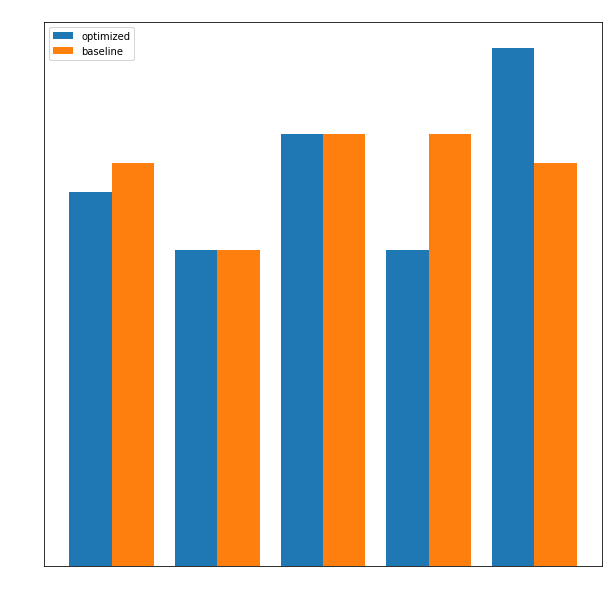

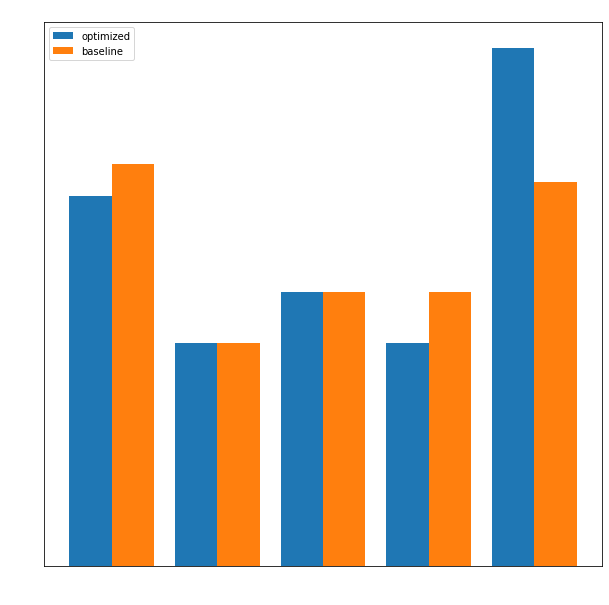

In [0]:
#Creating a barplot for the F1 micro averages
x_micro_opt = [key for key in dummies_f1_micro_opt.keys()]
y_micro_opt = [value for value in dummies_f1_micro_opt.values()]
bars = plt.bar(x_len-0.2,y_micro_opt, width=0.4,label="optimized")
bars = plt.bar(x_len+0.2,y_micro, width=0.4, label="baseline")
plt.title("f1 micro score with dummy classifiers")
plt.ylabel("f1 micro score" , color='w')
plt.xlabel("Strategy", color='w')
plt.xticks(x_len,x_micro_opt)

leg = plt.legend()
for text in leg.get_texts():
    plt.setp(text, color = 'black')

plt.show()

#Creating a barplot for the F1 micro averages
x_macro_opt = [key for key in dummies_f1_macro_opt.keys()]
y_macro_opt = [value for value in dummies_f1_macro_opt.values()]
bars = plt.bar(x_len-0.2,y_macro_opt, width=0.4, label="optimized")
bars = plt.bar(x_len+0.2,y_macro, width=0.4, label="baseline")
plt.title("f1 macro score with dummy classifiers")
plt.ylabel("f1 macro score" , color='w')
plt.xlabel("Strategy", color='w')
plt.xticks(x_len,x_micro_opt)

leg = plt.legend()
for text in leg.get_texts():
    plt.setp(text, color = 'black')
    
plt.show()

### Classification reports

In [0]:
print("\nClassification Precision, Recall, F1 on the optimized (oversampled) dataset")

print("\n"+UNDERLINE+"Uniform strategy"+END+"\n")
print(classification_report(Y_test, preds_uniform_opt))
print("\n"+UNDERLINE+"Constant 1 strategy"+END+"\n")
print(classification_report(Y_test, preds_constant_1_opt))
print("\n"+UNDERLINE+"Constant 2 strategy"+END+"\n")
print(classification_report(Y_test, preds_constant_2_opt))
print("\n"+UNDERLINE+"Most frequent strategy"+END+"\n")
print(classification_report(Y_test, preds_most_frequent_opt))
print("\n"+UNDERLINE+"Stratified strategy"+END+"\n")
print(classification_report(Y_test, preds_stratified_opt))


Classification Precision, Recall, F1 on the optimized (oversampled) dataset

Uniform strategy

              precision    recall  f1-score   support

           1       0.42      0.45      0.43        11
           2       0.57      0.53      0.55        15

    accuracy                           0.50        26
   macro avg       0.49      0.49      0.49        26
weighted avg       0.51      0.50      0.50        26


Constant 1 strategy

              precision    recall  f1-score   support

           1       0.42      1.00      0.59        11
           2       0.00      0.00      0.00        15

    accuracy                           0.42        26
   macro avg       0.21      0.50      0.30        26
weighted avg       0.18      0.42      0.25        26


Constant 2 strategy

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        11
           2       0.58      1.00      0.73        15

    accuracy                           0.5

## k Nearest Neighbors Classifier

Now we are going to use the grid search function we implemented in order to find the optimal pre-processing architecture and hyperparameters values for the kNN algorithm.

In [0]:
#Initializing the lists of values for the hyperparameters for grid search
var_thresh = list(range(0,19))
n_components = list(range(2,22,2))
n_neighbors = list(range(1,11,2))
balanced = [True, False]
normalization = [True, False]

#The none values that we append below are used when
#we don't want to apply that specific pre-processing method
var_thresh.insert(0,None)
n_components.insert(0,None)

In [0]:
f1_micro, val_micro = gridsearch(X_train, Y_train, var_thresh, n_components, n_neighbors, balanced, normalization, 'micro')

In [0]:
val_micro

{'balanced': False,
 'n_components': None,
 'n_neighbors': 5,
 'normalized': True,
 'variance_threshold': 2}

In [0]:
f1_micro

0.8700000000000001

In [0]:
f1_macro, val_macro = gridsearch(X_train, Y_train, var_thresh, n_components, n_neighbors, balanced, normalization, 'macro')

In [0]:
f1_macro

0.8617382617382617

In [0]:
val_macro

{'balanced': False,
 'n_components': 6,
 'n_neighbors': 7,
 'normalized': True,
 'variance_threshold': 1}

###Optimal kNN models

As we notice in the above outputs, the models that maximizes the f1 micro score is different than the one tha maximizes the f1 macro score.

In order to maximize the f1 micro score for the kNN algorithm we have to do the following:
- Feature selection with variance threshold = 2
- Normalization with z-score
- kNN algorithm with number of neighbors = 5


In [0]:
x_train_micro, y_train_micro, x_test_micro = pre_processing(2, True, None, False, X_train, Y_train, X_test)

start_time = time.time()
knn_micro_opt = KNeighborsClassifier(n_neighbors = 5)
knn_micro_opt.fit(x_train_micro, y_train_micro)
knn_pred_micro = knn_micro_opt.predict(x_test_micro)
knn_micro_ftime= time.time() - start_time

print("Execution time: %f seconds" %knn_micro_ftime)

Execution time: 0.005419 seconds


In order to maximize the f1 macro score for the kNN algorithm we have to do the following:
- Feature selection with variance threshold = 1 
- Normalization with z-score
- Principal Component Analysis with number of components = 6
- kNN algorithm with number of neighbors = 7

In [0]:
x_train_macro, y_train_macro, x_test_macro = pre_processing(1, True, 6, False, X_train, Y_train, X_test)

start_time = time.time()
knn_macro_opt = KNeighborsClassifier(n_neighbors = 7)
knn_macro_opt.fit(x_train_macro, y_train_macro)
knn_pred_macro = knn_macro_opt.predict(x_test_macro)
knn_macro_ftime= time.time() - start_time

print("Execution time: %f seconds" %knn_macro_ftime)

Execution time: 0.004044 seconds


### Accuracy plot

In [0]:
knn_micro_acc = accuracy_score(Y_test, knn_pred_micro)
print("The accuracy of the kNN optimized classifier is %f" %knn_micro_acc)

knn_macro_acc = accuracy_score(Y_test, knn_pred_macro)
print("The accuracy of the kNN optimized classifier is %f" %knn_macro_acc)

The accuracy of the kNN optimized classifier is 0.692308
The accuracy of the kNN optimized classifier is 0.730769


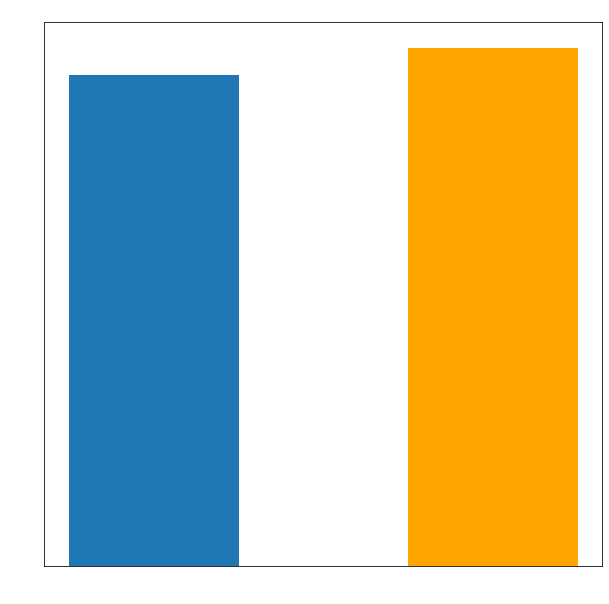

In [0]:
#Creating a barplot for the accuracies of the optimal models
y_accs = [knn_micro_acc, knn_macro_acc]
x_accs = ["kNN optimized for f1 micro", "kNN optimized for f1 macro"]
bars = plt.bar(x_accs,y_accs, width=0.5)
bars[1].set_color('orange')
plt.title("Accuracy for the two optimal models")
plt.ylabel("Accuracy" , color='w')
plt.xlabel("Model", color='w')
plt.show()

### Confusion matrices

In [0]:
print("Confusion matrix for the " + UNDERLINE + "optimized for f1 micro kNN classifier" + END +":")
print(confusion_matrix(Y_test,knn_pred_micro))
print("f1-micro average: %f" %f1_score(Y_test,knn_pred_micro, average="micro"))
print("f1-macro average: %f" %f1_score(Y_test,knn_pred_micro, average="macro"))
print("Confusion matrix for the " + UNDERLINE + "optimized for f1 macro kNN classifier" + END +":")
print(confusion_matrix(Y_test,knn_pred_macro))
print("f1-micro average: %f" %f1_score(Y_test,knn_pred_macro, average="micro"))
print("f1-macro average: %f" %f1_score(Y_test,knn_pred_macro, average="macro"))

Confusion matrix for the optimized for f1 micro kNN classifier:
[[ 6  5]
 [ 3 12]]
f1-micro average: 0.692308
f1-macro average: 0.675000
Confusion matrix for the optimized for f1 macro kNN classifier:
[[ 7  4]
 [ 3 12]]
f1-micro average: 0.730769
f1-macro average: 0.720430


So based on the output above, we have the following confusion matrices:

**kNN optimized for f1 micro**

|                            | Predicted Acceptables(1) | Predicted Unacceptables(2) |
|----------------------------|-----------------------|-------------------------|
| Actual Acceptables(1)   |           6           |            5            |
| Actual Unacceptables(2) |           3           |            12            |

**kNN optimized for f1 macro**

|                            | Predicted Acceptables(1) | Predicted Unacceptables(2) |
|----------------------------|-----------------------|-------------------------|
| Actual Acceptables(1)   |           7           |            4            |
| Actual Unacceptables(2) |           3           |            12            |

### F1 scores plots

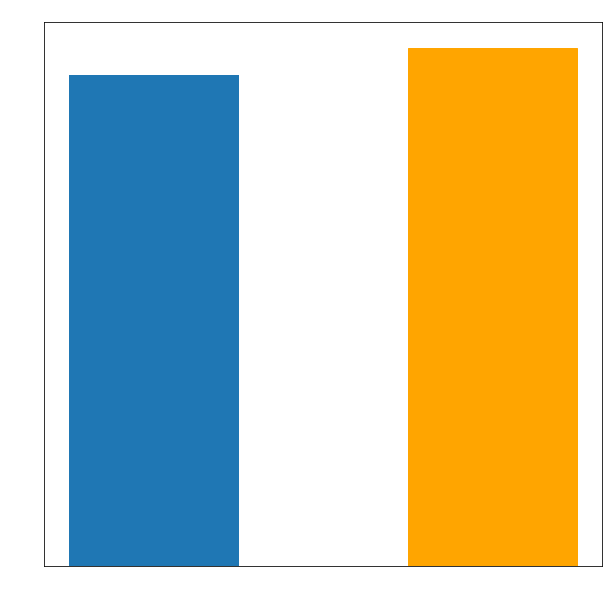

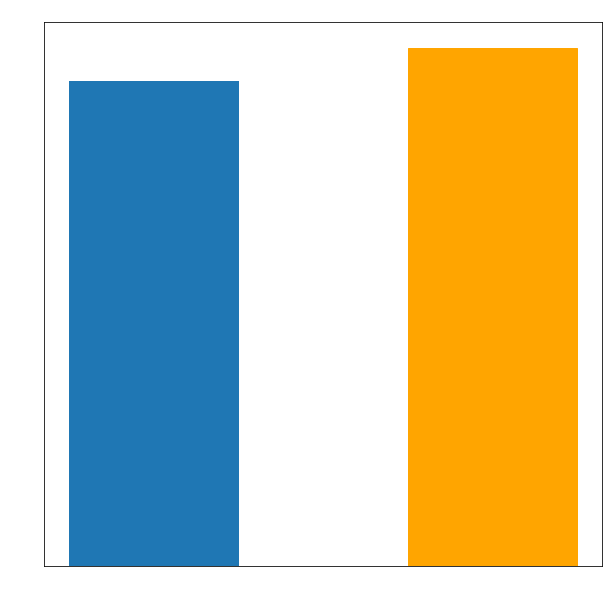

In [0]:
knn_micro_f1_micro = f1_score(Y_test,knn_pred_micro,average="micro")
knn_macro_f1_micro = f1_score(Y_test,knn_pred_macro,average="micro")

knn_micro_f1_macro = f1_score(Y_test,knn_pred_micro,average="macro")
knn_macro_f1_macro = f1_score(Y_test,knn_pred_macro,average="macro")

#Creating a barplot for the f1 micro scores of the optimal models
y_f1_micro = [knn_micro_f1_micro, knn_macro_f1_micro]
x_f1_micro = ["kNN optimized for f1 micro", "kNN optimized for f1 macro"]
bars = plt.bar(x_f1_micro,y_f1_micro, width=0.5)
bars[1].set_color('orange')
plt.title("F1 micro scores for the two optimal models")
plt.ylabel("F1 micro score" , color='w')
plt.xlabel("Model", color='w')
plt.show()

#Creating a barplot for the f1 macro scores of the optimal models
y_f1_macro = [knn_micro_f1_macro, knn_macro_f1_macro]
x_f1_macro = ["kNN optimized for f1 micro", "kNN optimized for f1 macro"]
bars = plt.bar(x_f1_macro,y_f1_macro, width=0.5)
bars[1].set_color('orange')
plt.title("F1 macro scores for the two optimal models")
plt.ylabel("F1 macro score" , color='w')
plt.xlabel("Model", color='w')
plt.show()



### Classification reports

In [0]:
print("\nClassification Precision, Recall, F1 on the optimized dataset for kNN")

print("\n"+UNDERLINE+"kNN optimized for f1 micro"+END+"\n")
print(classification_report(Y_test, knn_pred_micro))
print("\n"+UNDERLINE+"kNN optimized for f1 macro"+END+"\n")
print(classification_report(Y_test, knn_pred_macro))


Classification Precision, Recall, F1 on the optimized dataset for kNN

kNN optimized for f1 micro

              precision    recall  f1-score   support

           1       0.67      0.55      0.60        11
           2       0.71      0.80      0.75        15

    accuracy                           0.69        26
   macro avg       0.69      0.67      0.68        26
weighted avg       0.69      0.69      0.69        26


kNN optimized for f1 macro

              precision    recall  f1-score   support

           1       0.70      0.64      0.67        11
           2       0.75      0.80      0.77        15

    accuracy                           0.73        26
   macro avg       0.72      0.72      0.72        26
weighted avg       0.73      0.73      0.73        26



## Cumulatively F1-scores plots

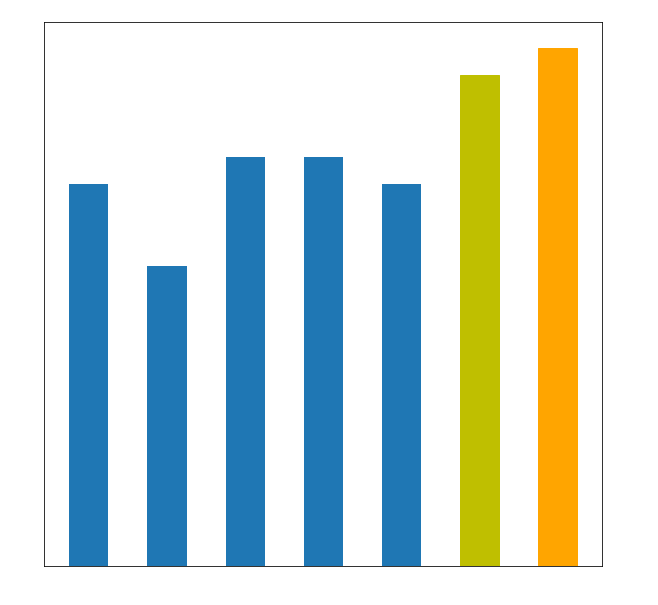

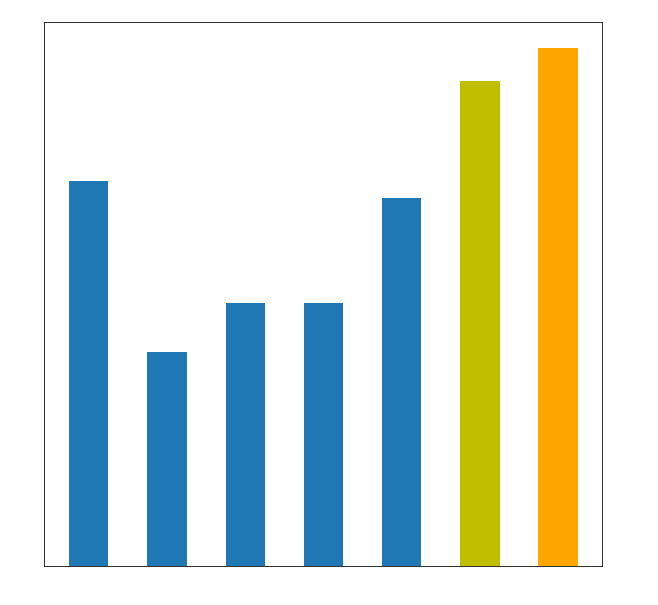

In [0]:
#Creating a barplot for the F1 micro averages
x_micro_opt_com = x_micro_opt.copy()
x_micro_opt_com.append("kNN algorithm optimized for f1 micro")
x_micro_opt_com.append("kNN algorithm optimized for f1 macro")
y_micro_opt_com = y_micro.copy()
y_micro_opt_com.append(knn_micro_f1_micro)
y_micro_opt_com.append(knn_macro_f1_micro)

bars = plt.bar(x_micro_opt_com,y_micro_opt_com, width=0.5)
bars[5].set_color('y')
bars[6].set_color('orange')
plt.title("f1 micro score on different classifiers")
plt.ylabel("f1 micro score" , color='w')
plt.xlabel("Model", color='w')
plt.show()

#Creating a barplot for the F1 micro averages
x_macro_opt_com = x_macro_opt.copy()
x_macro_opt_com.append("kNN algorithm optimized for f1 micro")
x_macro_opt_com.append("kNN algorithm optimized for f1 macro")
y_macro_opt_com = y_macro.copy()
y_macro_opt_com.append(knn_micro_f1_macro)
y_macro_opt_com.append(knn_macro_f1_macro)

bars = plt.bar(x_macro_opt_com,y_macro_opt_com, width=0.5)
bars[5].set_color('y')
bars[6].set_color('orange')
plt.title("f1 macro score on different classifiers")
plt.ylabel("f1 macro score" , color='w')
plt.xlabel("Model", color='w')
plt.show()

## Project questions

1. See the subsections of [Dummy classifiers](#scrollTo=QhoBI6W0ANO5) and [k Nearest Neighbors](#scrollTo=afmG142y7kPT)
2. We have the following table based on the output in the section [Optimal kNN models](#scrollTo=MubClUH5ctm_):





| Model                      | Execution time |
|----------------------------|----------------|
| kNN optimized for f1 micro |       0.005419  seconds       |
| kNN optimized for f1 macro |        0.004044   seconds     |

3. See [Cumulatively F1-scores plots](#scrollTo=s3kdqhXQluhB)  
4. We have the following table:

| Model\Metric                           | Baseline accuracy | Optimized accuracy | Baseline f1 micro score | Optimized f1 micro score | Baseline f1 macro score | Optimized f1 macro score |
|----------------------------------------|-------------------|--------------------|-------------------------|--------------------------|-------------------------|--------------------------|
| Uniform dummy classifier               |      0.538461     |         0.5        |         0.538462        |            0.5           |         0.535714        |         0.493253         |
| Constant 1 dummy classifier            |      0.423076     |      0.423076      |         0.423077        |         0.423077         |         0.297297        |         0.297297         |
| Constant 2 dummy classifier            |      0.576923     |      0.576923      |         0.576923        |         0.576923         |         0.365854        |         0.385854         |
| Most frequent dummy classifier         |      0.576923     |      0.423076      |         0.576923        |         0.423077         |         0.685854        |         0.297297         |
| Stratified dummy classifier            |      0.461538     |      0.384615      |         0.538462        |         0.692308         |         0.512500        |         0.690476         |
| Baseline kNN                           |        0.5        |          -         |           0.5           |             -            |         0.460925        |             -            |
| kNN classifier optimized for f1 micro  |         -         |      0.692308      |            -            |         0.692308         |            -            |           0.675          |
| kNN classifier optimized for f1 macro  |         -         |      0.730769      |            -            |         0.730769         |            -            |         0.720430         |

5. As we can see in the table above, the most improved performance by the optimization is that of the kNN classifiers. Both kNN optimized for micro f1 score and kNN optimized for macro f1 score perform very well (in comparison with the baseline classification) on our test set. 

  Its interesting to notice that while the first kNN classifier was optimized to maximize the f1 micro score, the second classifier (optimized for f1 macro score) scores a higher f1 micro score on the test set. This happens because the macro average computes the metric independently for each class and then takes the average, so it treats all the classes equally, whereas the micro average will aggregate the contributions of all classes to compute the average metric. We also know that our trainning set is imbalanced. That said the micro average won't treat the lower class ("Acceptables") equally and this is why the kNN classifier optimized for f1 macro performs best.

  In addition, as we can see in the [Cumulatively F1-scores plots](#scrollTo=s3kdqhXQluhB), the classifier that perfroms best is the kNN optimized for f1 macro. This is because this kNN classifier respects the distribution of the classes and also due to the optimal pre-processing of the data, its able to separate better the objects of each class.

  Furthermore, another observation that we can make based on the table above and the plots is that balancing the data via the process of oversampling, doesn't help the dummy classifiers. Since the classes are balanced, the most frequent strategy is the "Constant 1", probably in alphabetical order. But the test set distribution is not balanced. So it will also favor the "Unacceptable" class. This means that the most frequent strategy will perform worse after balancing the data. The same thing happens to the stratified strategy. It also respects the distribution of the classes in the training set. Now that the training set is balanced, its predictions will also be even in reference to the classes. So as we expect the accuracy of this classifier drops in the imbalanced test set. It's interesting though to notice that the f1 scores, both micro and macro average, rise up. The values we get for these metrics are comparable to the ones of the kNN classifiers.

  As for the precision and recall, we can also see that the classifiers that perform better at these metrics, are the kNN classifiers. For the same reason as above, the stratified dummy classifiers has an equal (or close enough) perfromance at this metrics.

  At last, as we can see above the execution time we need to fit and make predictions with the kNN classifiers is quite low. For the first classifier (kNN optimized for micro average) we need just 0.005419 seconds and for the second classifier (kNN optimized for macro average) we need 0.004044 seconds. These low execution times are mainly because of the small training set they try to fit, but also because of the nature of the kNN algorithm itself.



